# 1.Problem Statement

### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

### Business Goal: 
### You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 2. Reading the data set

In [2]:
df= pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking for the column names and its data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Note: We can see that there is no null values present in the data frame. Therefore we can proceed further. 

In [5]:
# Finding the mean value, highest and lowest value to see if all the columns have standardized value for the evaluation.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Finding the shape of the data set
df.shape

(730, 16)

In [7]:
# Setting 'Instant' as the index
df.set_index("instant", inplace=True)

In [8]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###### Note: Since the model has to be based upon "cnt" therefore "casual" and "registered" would be redundant and would complicate the model, hence dropping the "casual" and "registered" columns from the data set.

In [9]:
# Dropping the casual and registered column from the data set. Because "cnt" is the amalgamation of casual and registered.
df.drop(['casual', 'registered'], axis=1, inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 79.8+ KB


In [11]:
# Converting the dteday to Date Time
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'].dtypes

dtype('<M8[ns]')

In [12]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 79.8 KB


In [14]:
# Changing the month number to month abbr for better view
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [15]:
df[['season', 'weekday','weathersit']] = df[['season', 'weekday','weathersit']].astype('str')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 79.8+ KB


In [17]:
# Checking the number of null values after chaning the data types of few columns.
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [18]:
df['weathersit'].replace(['1','2','3','3'],['Good','Average','Bad','Very Bad'], inplace=True)

In [19]:
df['season'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [20]:
df['season'].replace(['1','2','3','4'],['spring', 'summer','fall','winter'], inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 79.8+ KB


In [22]:
df['workingday'].unique()

array([1, 0], dtype=int64)

In [23]:
df['weekday'].unique()

array(['1', '2', '3', '4', '5', '6', '0'], dtype=object)

# 3. Visualizing the Data

In [24]:
import matplotlib.pyplot as plt

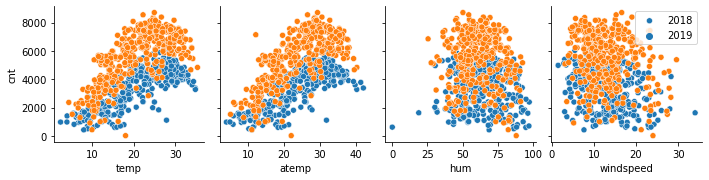

In [25]:

# Checking linear relationship between the cnt variable and other numeric variables
x =sns.pairplot(df, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , hue='yr' )
x._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

###### We see that there is a linear relationship between 'cnt' v/s 'temp' & 'atemp' whereas there is no evident relation between 'cnt' v/s 'hum' and 'windspeed'. We can also see that there the sales/cnt is huge for 2019 compared to 2018.

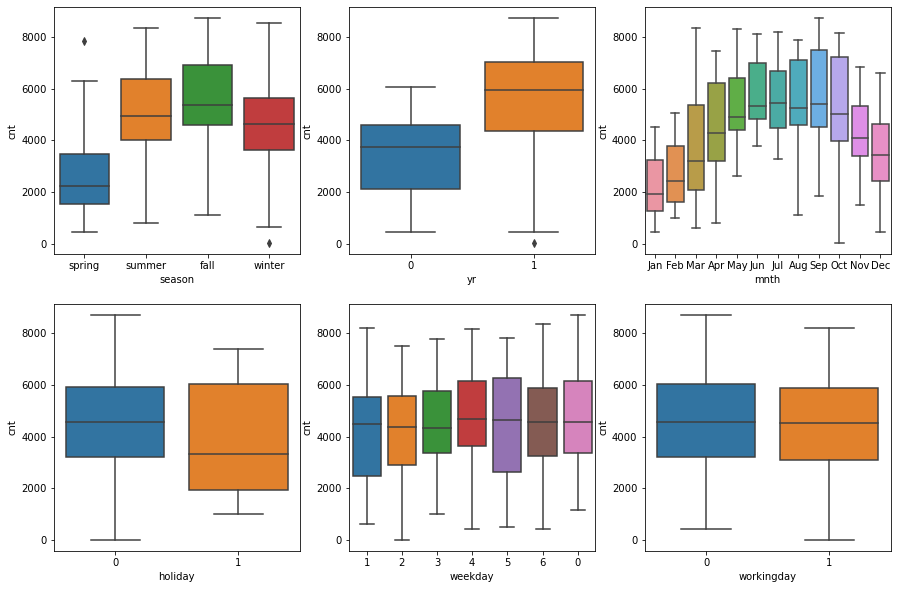

In [26]:
# Checking the distribution of rentals across different categorical variables
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.show()

##### The cnt starts picking up in the season of Summers and then gradually increases in the season of falls as it approaches Winter there is a dip in the cnt value.

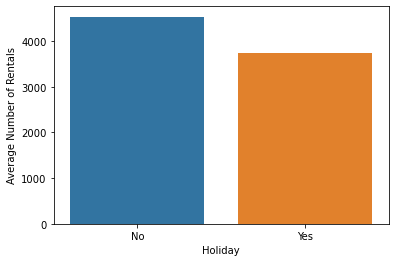

In [27]:
# Checking business on Holidays
holiday_df = df.groupby(['holiday'])['cnt'].mean().reset_index()
sns.barplot(x='holiday', y='cnt', data=holiday_df)
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Holiday')
plt.ylabel('Average Number of Rentals')
plt.show()

###### Non Holidays have slight higher average rentals

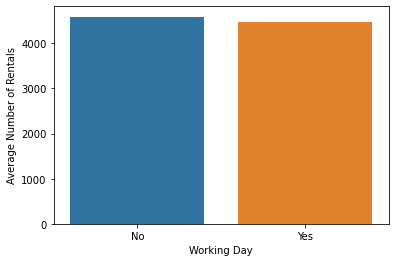

In [28]:
# Checking business on Workingdays
workingday_df = df.groupby(['workingday'])['cnt'].mean().reset_index()
sns.barplot(x='workingday', y='cnt', data=workingday_df)
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Working Day')
plt.ylabel('Average Number of Rentals')
plt.show()

# 4. Creating Dummy Variables for Categorical Data

##### We need to create dummy variables for the following columns.
- season
- mnth
- weekday
- weathersit

In [29]:
dummy= pd.get_dummies(df[['season', 'mnth','weekday','weathersit']], drop_first=True)

In [30]:
dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Good,weathersit_Very Bad
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [31]:
df= pd.concat([df,dummy],axis=1)
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)
df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Good,weathersit_Very Bad
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,0,0,0,0
3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,1,0
4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,1,0
5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,0,1,0


In [32]:
# Since we have the month and the Year in two seperate columns, we do not need the date column anymore, thus dropping it
df.drop('dteday', inplace=True, axis = 1)

In [33]:
# Moving the cnt to the end for easier identification
first_col = df.pop('cnt') # removing the 'cnt' column and then adding it to the df data frame.
df['cnt'] = first_col

In [34]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Good,weathersit_Very Bad,cnt
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,1,0,0,0,0,0,0,0,985
2,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,1,0,0,0,0,0,0,801
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,1,0,0,0,1,0,1349
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,1,0,0,1,0,1562
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,1,0,1,0,1600


# 5. Splitting the data for training and testing

In [35]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [36]:
print('Shape of the Train data is:' , df_train.shape)
print('Shape of the Test data is:' , df_test.shape)

Shape of the Train data is: (510, 30)
Shape of the Test data is: (220, 30)


In [37]:
# Checking the Train Data
pd.set_option('display.max_columns', None)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Good,weathersit_Very Bad,cnt
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,7216
427,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4066
729,1,0,1,10.489153,11.5850,48.3333,23.500518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1796
483,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4220
112,0,0,0,13.803347,16.0977,72.9583,14.707907,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1683


# 6. Feature Scaling 

In [38]:
# We do a MinMax scaling
scaler = MinMaxScaler()    #Instantiating the object
cols = df_train.columns
df_train[cols] = scaler.fit_transform(df_train[cols])

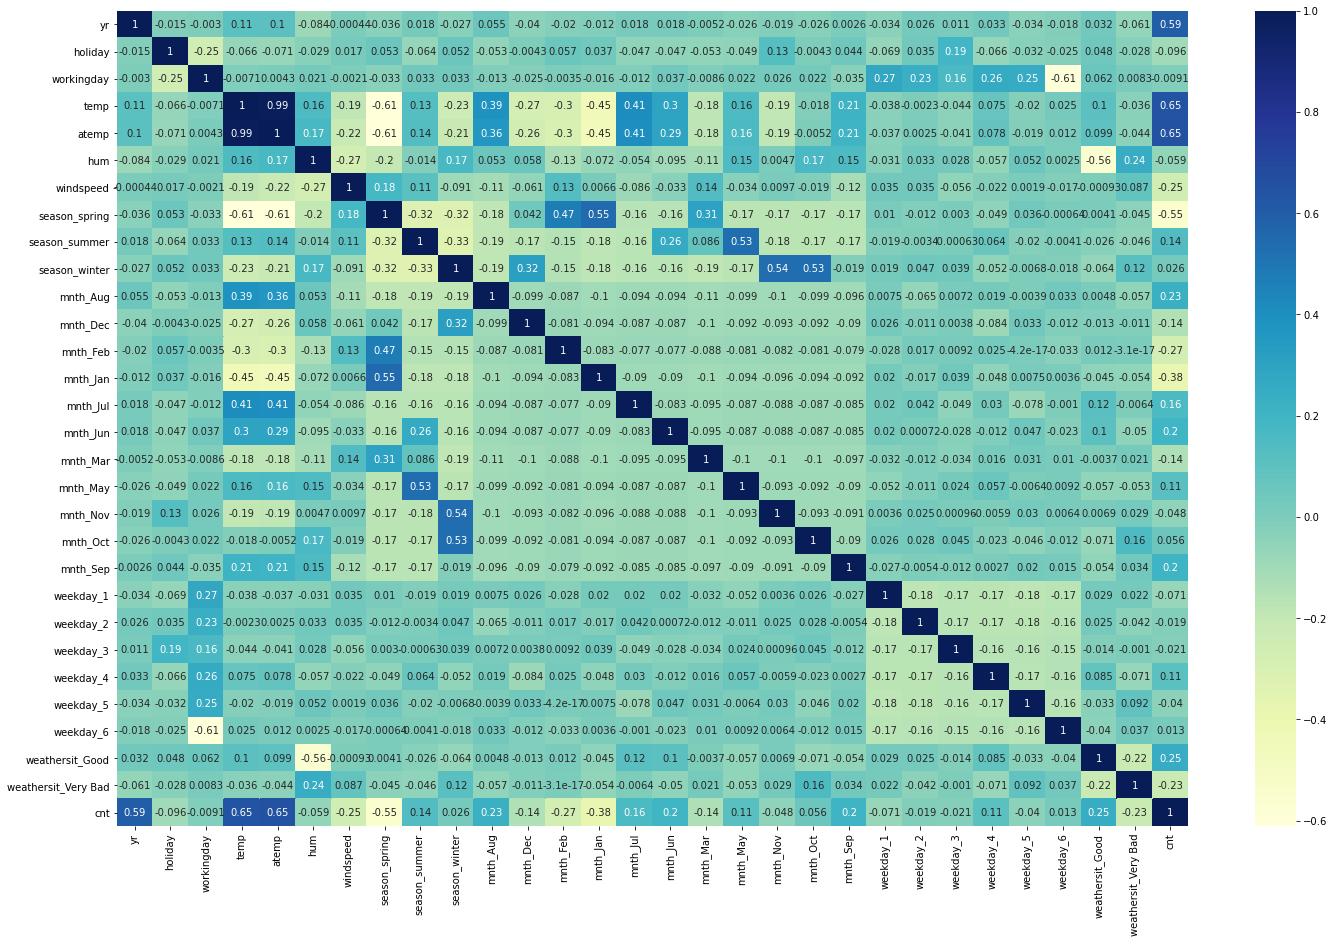

In [39]:
# Checking the Heatmap
plt.figure(figsize=(24,15))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

##### We see that 'cnt' has strong colinearity with yr, temp, atemp. But, temp and atemp have almost a perfect colinearity, so both cannot be part of the model. We keep this in mind while building the model in the following cells.

# 7. Model Building

###### We will keep all the columns, and then keep removing the columns based upon Statistical Significance and Co-Linearity.We will stop when we notice that there is no further improvement in the R2 value or all variables are statistically significant with low VIF. 

In [40]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.24e-177
Time:                        18:15:53   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2838      0.047      6.021      0.000       0.191       0.376
yr                      0.2312      0.008     28.360      0.000       0.215       0.247
holiday                -0.1345      0.066     -2.054      0.041      -0.263      -0.006
workingday             -0.0605      0.071     -0.849      0.396      -0.200       0.079
temp                    0.3873      0.143      2.699      0.007       0.105       0.669
atemp                   0.0547      0.139      0.392      0.695      -0.219       0.329
hum                    -0.1579      0.039     -4.050      0.000      -0.234      -0.081
windspeed              -0.1802      0.027     -6.751      0.000      -0.233      -0.128
season_spring          -0.0409      0.030     -1.349      0.178      -0.100       0.019
season_summer           0.0458      0.026      1.733      0.084      -0.006       0.098
season_winter           0.1121      0.028      3.969      0.000       0.057       0.168
mnth_Aug                0.0291      0.034      0.849      0.396      -0.038       0.096
mnth_Dec               -0.0444      0.034     -1.308      0.191      -0.111       0.022
mnth_Feb               -0.0373      0.033     -1.119      0.264      -0.103       0.028
mnth_Jan               -0.0640      0.034     -1.887      0.060      -0.131       0.003
mnth_Jul               -0.0274      0.035     -0.773      0.440      -0.097       0.042
mnth_Jun                0.0097      0.025      0.384      0.701      -0.040       0.059
mnth_Mar                0.0010      0.025      0.041      0.967      -0.048       0.050
mnth_May                0.0256      0.021      1.196      0.232      -0.016       0.068
mnth_Nov               -0.0395      0.037     -1.076      0.282      -0.112       0.033
mnth_Oct                0.0058      0.036      0.159      0.874      -0.065       0.077
mnth_Sep                0.0916      0.032      2.837      0.005       0.028       0.155
weekday_1               0.0252      0.072      0.352      0.725      -0.116       0.166
weekday_2               0.0238      0.071      0.333      0.739      -0.116       0.164
weekday_3               0.0396      0.071      0.560      0.576      -0.100       0.179
weekday_4               0.0541      0.072      0.753      0.452      -0.087       0.195
weekday_5               0.0499      0.072      0.696      0.487      -0.091       0.191
weekday_6              -0.0058      0.015     -0.378      0.706      -0.036       0.025
weathersit_Good         0.0578      0.011      5.486      0.000       0.037       0.079
weathersit_Very Bad    -0.1914      0.025     -7.569      0.000      -0.241      -0.142
==============================================================================
Omnibus:                       78.724   Durbin-Watson:                   2.008
Prob(Omnibus):       

In [41]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,438.82
4,atemp,382.21
2,workingday,229.65
21,weekday_1,50.78
22,weekday_2,49.61
25,weekday_5,48.16
24,weekday_4,47.09
23,weekday_3,43.27
5,hum,34.56
7,season_spring,12.18


###### The R-squared is a significant 85%, but there are insignificant variables and variables with strong multicollinearity. We need to get rid of them, in the following cells, we will follow the same process in an itrative manner till we build a robust model. First we will remove all columns with High P Values and then when the P Values are acceptable for all the columns, we will check their VIF and remove them.

In [42]:

# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Mar',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model2 = lr.fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.53
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.24e-178
Time:                        18:15:54   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     481   BIC:                            -865.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2844    

In [43]:

# Removing 'weekday_4' due to high P-Value
X = X.drop('weekday_4',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()
print(lr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.62e-179
Time:                        18:15:54   Log-Likelihood:                 522.77
No. Observations:                 510   AIC:                            -989.5
Df Residuals:                     482   BIC:                            -871.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2838    

In [44]:
# Removing 'mnth_Oct' due to high P-Value
X = X.drop('mnth_Oct',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model4 = lr.fit()
print(lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.59e-180
Time:                        18:15:54   Log-Likelihood:                 522.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     483   BIC:                            -877.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2851    

In [45]:
# Removing 'mnth_Jun' due to high P-Value
X = X.drop('mnth_Jun',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model5 = lr.fit()
print(lr_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.58e-181
Time:                        18:15:55   Log-Likelihood:                 522.69
No. Observations:                 510   AIC:                            -993.4
Df Residuals:                     484   BIC:                            -883.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2859    

In [46]:
# Removing 'weekday_3' due to high P-Value
X = X.drop('weekday_3',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model6 = lr.fit()
print(lr_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     114.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.02e-182
Time:                        18:15:55   Log-Likelihood:                 522.35
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     485   BIC:                            -888.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2854    

In [47]:
# Removing 'atemp' due to high P-Value
X = X.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model7 = lr.fit()
print(lr_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.94e-183
Time:                        18:15:55   Log-Likelihood:                 522.29
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     486   BIC:                            -895.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2852    

In [48]:
# Removing 'weekday_5' due to high P-Value
X = X.drop('weekday_5',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model8 = lr.fit()
print(lr_model8.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.76e-184
Time:                        18:15:55   Log-Likelihood:                 522.26
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     487   BIC:                            -901.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2850    

In [49]:
# Removing 'mnth_Aug' due to high P-Value
X = X.drop('mnth_Aug',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model9 = lr.fit()
print(lr_model9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.07e-185
Time:                        18:15:55   Log-Likelihood:                 521.93
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     488   BIC:                            -906.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2958    

In [50]:
# Removing 'weekday_2' due to high P-Value
X = X.drop('weekday_2',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model10 = lr.fit()
print(lr_model10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.33e-185
Time:                        18:15:55   Log-Likelihood:                 519.79
No. Observations:                 510   AIC:                            -997.6
Df Residuals:                     489   BIC:                            -908.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3011    

In [51]:

# Removing 'weekday_1' due to high P-Value
X = X.drop('weekday_1',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model11 = lr.fit()
print(lr_model11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.84e-186
Time:                        18:15:55   Log-Likelihood:                 518.79
No. Observations:                 510   AIC:                            -997.6
Df Residuals:                     490   BIC:                            -912.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2995    

In [52]:

# Removing 'mnth_May' due to high P-Value
X = X.drop('mnth_May',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model12 = lr.fit()
print(lr_model12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          5.13e-187
Time:                        18:15:55   Log-Likelihood:                 517.94
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     491   BIC:                            -917.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2892    

In [53]:
# Removing 'mnth_Feb' due to high P-Value
X = X.drop('mnth_Feb',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model13 = lr.fit()
print(lr_model13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.45e-187
Time:                        18:15:56   Log-Likelihood:                 516.59
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     492   BIC:                            -921.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2780    

In [54]:
# Removing 'weekday_6' due to high P-Value
X = X.drop('weekday_6',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model14 = lr.fit()
print(lr_model14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.19e-188
Time:                        18:15:56   Log-Likelihood:                 516.51
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     493   BIC:                            -927.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2753    

In [55]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.81
3,temp,21.41
6,season_spring,4.98
5,windspeed,4.72
8,season_winter,4.35
2,workingday,3.73
14,weathersit_Good,3.67
7,season_summer,3.01
0,yr,2.09
12,mnth_Nov,1.87


In [56]:
# Removing 'hum' due to high VIF
X = X.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model14 = lr.fit()
lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.69e-186
Time:                        18:15:56   Log-Likelihood:                 507.84
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     494   BIC:                            -915.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1808      0.033      5.553      0.000       0.117       0.245
yr                      0.2343      0.008     28.811      0.000       0.218       0.250
holiday                -0.1087      0.027     -4.046      0.000      -0.161      -0.056
workingday             -0.0223      0.009     -2.413      0.016      -0.040      -0.004
temp                    0.4373      0.036     12.112      0.000       0.366       0.508
windspeed              -0.1589      0.025     -6.323      0.000      -0.208      -0.110
season_spring          -0.0715      0.021     -3.341      0.001      -0.114      -0.029
season_summer           0.0356      0.015      2.305      0.022       0.005       0.066
season_winter           0.0880      0.018      4.915      0.000       0.053       0.123
mnth_Dec               -0.0444      0.018     -2.514      0.012      -0.079      -0.010
mnth_Jan               -0.0500      0.018     -2.734      0.006      -0.086      -0.014
mnth_Jul               -0.0506      0.018     -2.745      0.006      -0.087      -0.014
mnth_Nov               -0.0387      0.019     -2.029      0.043      -0.076      -0.001
mnth_Sep                0.0683      0.017      4.007      0.000       0.035       0.102
weathersit_Good         0.0819      0.009      9.414      0.000       0.065       0.099
weathersit_Very Bad    -0.2109      0.025     -8.470      0.000      -0.260      -0.162
==============================================================================
Omnibus:                       74.623   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.133
Skew:                          -0.766   Prob(JB):                     5.66e-39
Kurtosis:                       5.437   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#Checking the VIF Again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.60
4,windspeed,4.70
2,workingday,3.61
5,season_spring,3.12
7,season_winter,3.03
13,weathersit_Good,2.89
6,season_summer,2.29
0,yr,2.07
11,mnth_Nov,1.83
9,mnth_Jan,1.65


In [58]:
# Removing 'temp' due to high VIF
X = X.drop('temp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model15 = lr.fit()
print(lr_model15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     136.1
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.68e-159
Time:                        18:15:56   Log-Likelihood:                 441.53
No. Observations:                 510   AIC:                            -853.1
Df Residuals:                     495   BIC:                            -789.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5244    

In [59]:
# Removing 'mnth_Jul' due to high VIF
X = X.drop('mnth_Jul',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model16 = lr.fit()
print(lr_model16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.05e-160
Time:                        18:15:56   Log-Likelihood:                 441.10
No. Observations:                 510   AIC:                            -854.2
Df Residuals:                     496   BIC:                            -794.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5179    

In [60]:
# Removing 'season_winter' due to high VIF
X = X.drop('season_winter',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model17 = lr.fit()
print(lr_model17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     158.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.50e-161
Time:                        18:15:57   Log-Likelihood:                 440.64
No. Observations:                 510   AIC:                            -855.3
Df Residuals:                     497   BIC:                            -800.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5128    

In [61]:
#Checking the VIF Again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.89
2,workingday,2.99
10,weathersit_Good,2.46
4,season_spring,2.39
0,yr,1.86
5,season_summer,1.74
7,mnth_Jan,1.62
8,mnth_Nov,1.27
9,mnth_Sep,1.17
6,mnth_Dec,1.14


##### As we can see that the p-value is lesser than 0.05 and the VIF is lesser than 5. Hence we have removed all the columns which had collinearity and could be problem for us. 

# 8. Validating the assumptions of Linear Regression 
    - Linear Relationship
    - Homoscedasticity
    - Absence of Multicollinearity
    - Independence of residuals (absence of auto-correlation)
    - Normality of Errors

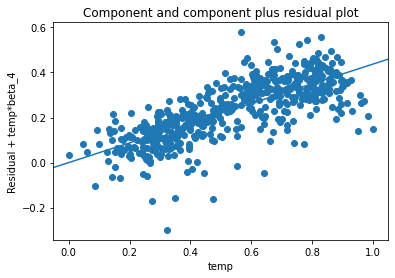

In [62]:
# Validating Linear Relationship
sm.graphics.plot_ccpr(lr_model14, 'temp')
plt.show()

###### The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. As we can see in the above graph, the linearity is well respected. 

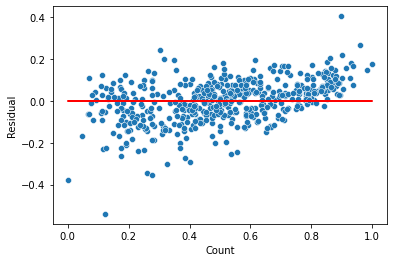

In [63]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable
y_train_pred = lr_model17.predict(X_train_sm)
sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

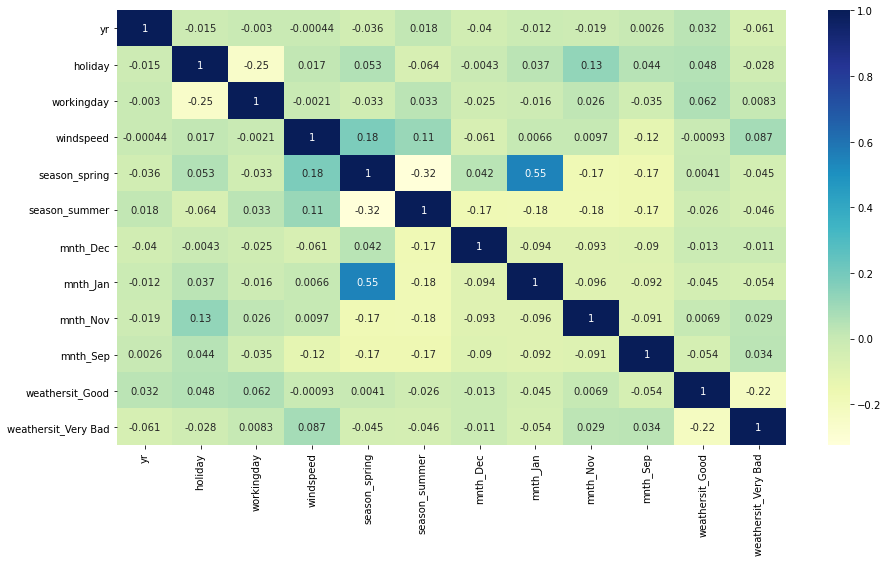

In [64]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [65]:
print('The Durbin-Watson value for Model No.14 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Model No.14 is 1.9423


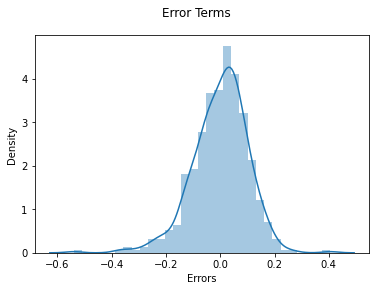

In [66]:
# Normality of Errors
y_train_pred = lr_model17.predict(X_train_sm)

# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')     
plt.show()

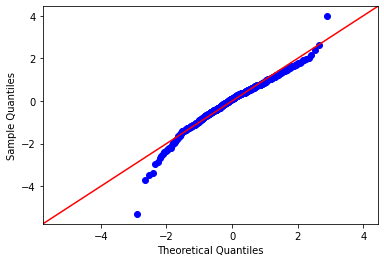

In [67]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

# 9. Predicting the Final Model

In [68]:
# Scaling the Test Dataset with the Scaler of the Training Set
cols = df_test.columns
df_test[cols] = scaler.transform(df_test[cols])

In [69]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
# Adding the constant column
X_test_m17 = sm.add_constant(X_test)
# Removing all the columns which has been removed from Model 14
X_test_m17 = X_test_m17.drop(['hum','mnth_Feb','mnth_Mar','mnth_May',
                              'mnth_Jun','mnth_Aug','mnth_Oct','atemp',
                              'weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6','temp','mnth_Jul','season_winter' ], axis=1)

In [71]:
# Making prediction using Model 14
y_test_pred = lr_model17.predict(X_test_m17)

# 10. Model Evaluation

In [72]:
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_test_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_test_pred))

The R-Squared score of the model for the predicted values is 0.78
The Root Mean Squared Error of the model for the predicted values is 0.1022
The Mean Absolute Error of the model for the predicted values is 0.07859317290302986


In [73]:
# As asked in problem statement
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7815728747560147

##### Since the bookings increase on good weather days with hotter temperature, the company must increase their bike availibilty and promotions during the summer months to further increase their booking count.